# SISTEM LINIER

# 1.1 menggambar persamaan bidang dalam ruang 3 dimensi
gambarkan persamaan berikut:
$$
3x_1+2x_2-3x_3=10\\
2x_1-4x_2+6x_3=20\\
x_1+x_2-x_3=5\\
$$

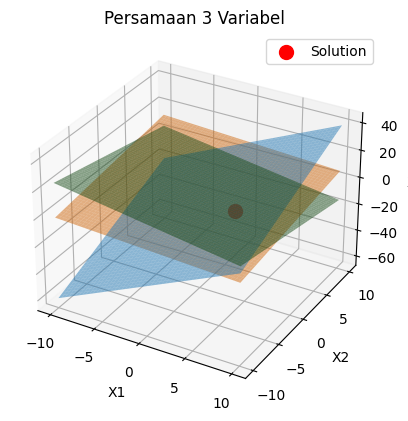

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Persamaan
# 3x1 + 2x2 - x3 = 10
# 2x1 - 4x2 + 6x3 = 20
# x1 + x2 + x3 = 5

# Koefisien
A = np.array([[3, 2, -1],
              [2, -4, 6],
              [1, 1, 1]])

# Konstanta
b = np.array([10, 20, 5])

# Solusi
solution = np.linalg.solve(A, b)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Persamaan 3D
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
x1, x2 = np.meshgrid(x1, x2)
x3 = (10 - 3*x1 - 2*x2) / -1
ax.plot_surface(x1, x2, x3, alpha=0.5)

x3 = (20 - 2*x1 + 4*x2) / 6
ax.plot_surface(x1, x2, x3, alpha=0.5)

x3 = 5 - x1 - x2
ax.plot_surface(x1, x2, x3, alpha=0.5)

# Solusi
ax.scatter(solution[0], solution[1], solution[2], color='r', marker='o', s=100, label='Solution')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

plt.title('Persamaan 3 Variabel')
plt.legend()
plt.show()


#1.2. ELIMINASI GAUSSIAN#
Eliminasi gauss ditemukan oleh Carl Friedrich Gauss, metode ini dapat dimanfaatkan untuk memecahkan sistem persamaan linear dengan merepresentasikan (mengubah) menjadi bentuk matriks, matriks tersebut lalu diubah kebentuk Eselon Baris melalui Operasi Baris Elementer. Kemudian sistem diselesaikan dengan substitusi balik.
**Bentuk Eselon Baris**
Suatu matriks memiliki bentuk eselon baris jika memenuhi 3 kriteria berikut

*  Jika didalam baris terdapat elemen-elemen yang tidak semuanya nol, maka bilangan tak nol pertama di dalam baris tersebut adalah 1.

*   kalau ada baris-baris yang semua elemennya bernilai 0 semua, maka baris-baris tersebut harus dikelompokkan dan diletakkan dibagian bawah matriks.
*   Jika terdapat dua baris berurutan yang memenuhi kriteria pertama, maka angka 1 (pertama/utama) dari baris yang lebih rendah berada lebih kekanan dari angka 1(pertama/utama) baris yang diatasnya.

ADA TIGA OPERASI YANG DAPAT DILAKUKAN

Tukarkan posisi kedua persamaan.

1.   Tukarkan posisi kedua persamaan.
2.   Kalikan persamaan dengan bilangan apa pun yang bukan nol.
3.   Gantikan suatu persamaan dengan jumlah persamaan itu sendiri dan kelipatan persamaan lainnya.




#eliminasi gauss
**Contoh**

>
selsaikan persamaan berikut:
$$
8x_1+9x_2+x_3=19\\
x_1+2x_2+3x_3=9\\
2x_1+x_2+x_3=5\\
$$

**berikut penyelesaian diatas**
yang pertama deklarasikan RowSwap, RowAdd dan RowScale untuk perhitungan




In [ ]:
import numpy as np

def RowSwap(A,k,l):
# =============================================================================
#     A is a NumPy array.  RowSwap will return duplicate array with rows
#     k and l swapped.
# =============================================================================
    m = A.shape[0]  # m is number of rows in A
    n = A.shape[1]  # n is number of columns in A

    B = np.copy(A).astype('float64')

    for j in range(n):
        temp = B[k][j]
        B[k][j] = B[l][j]
        B[l][j] = temp

    return B

def RowScale(A,k,scale):
# =============================================================================
#     A is a NumPy array.  RowScale will return duplicate array with the
#     entries of row k multiplied by scale.
# =============================================================================
    m = A.shape[0]  # m is number of rows in A
    n = A.shape[1]  # n is number of columns in A

    B = np.copy(A).astype('float64')

    for j in range(n):
        B[k][j] *= scale

    return B

def RowAdd(A,k,l,scale):
# =============================================================================
#     A is a numpy array.  RowAdd will return duplicate array with row
#     l modifed.  The new values will be the old values of row l added to
#     the values of row k, multiplied by scale.
# =============================================================================
    m = A.shape[0]  # m is number of rows in A
    n = A.shape[1]  # n is number of columns in A

    B = np.copy(A).astype('float64')

    for j in range(n):
        B[l][j] += B[k][j]*scale

    return B

2.   buat array NumPy dengan nilai-nilai ini. Kita akan memberi nama pada array A, sehingga kita bisa memanggilnya lagi nanti.



In [ ]:
import numpy as np
A=np.array([[8,9,1,19],[1,2,3,9],[2,1,1,5]])
print(A)

[[ 8  9  1 19]
 [ 1  2  3  9]
 [ 2  1  1  5]]


 **mendefinisikan fungsi operasi baris eliminasi gaus**
* RowSwap(Operasi penukaran baris dilakukan dengan menukar posisi dua baris dalam matriks)
* RowScale(Operasi skalasi baris melibatkan mengalikan satu baris matriks dengan suatu skalar.)
* RowAdd(Operasi penambahan baris dilakukan dengan menambahkan kelipatan dari satu baris matriks ke baris lainnya.)

kita coba operasikan dengan fungsi RowSwap,RowScale dan RowAdd

kita jalankan operasi baris dan menyimpannya sebagai langkah baru, kita dapat menyebutnya dengan A1,A2,A3 dll  Dengan cara ini kita dapat memeriksa prosesnya, atau membuat perubahan sesuai yang kita inginkan.

In [ ]:
B1 = RowSwap(A,0,2)
B2 = RowScale(A,2,0.5)
B3 = RowAdd(A,0,1,2)

In [ ]:
print(A)
print('\n')
print(B2)

[[ 8  9  1 19]
 [ 1  2  3  9]
 [ 2  1  1  5]]


[[ 8.   9.   1.  19. ]
 [ 1.   2.   3.   9. ]
 [ 1.   0.5  0.5  2.5]]


In [ ]:
## tukar baris 1 dengan baris 2
A1 = RowSwap(A,0,1)
print(A1,'\n')

##tambahkan kali-3 baris 0 dengan baris 1
A2 = RowAdd(A1,0,1,-8)
print(A2,"\n")

A3 = RowAdd(A2,0,2,-2)
print(A3,"\n")
A4 = RowAdd(A3,2,1,-2)
print(A4,"\n")
A5 = RowScale(A4,1,-1)
print(A5,"\n")
A6 = RowAdd(A5,1,2,3)
print(A6,"\n")
A7 = RowScale(A6,2,1/17)
print(A7,"\n")
A8 = RowAdd(A7,2,1,-7)
print(A8,"\n")

[[ 1.  2.  3.  9.]
 [ 8.  9.  1. 19.]
 [ 2.  1.  1.  5.]] 

[[  1.   2.   3.   9.]
 [  0.  -7. -23. -53.]
 [  2.   1.   1.   5.]] 

[[  1.   2.   3.   9.]
 [  0.  -7. -23. -53.]
 [  0.  -3.  -5. -13.]] 

[[  1.   2.   3.   9.]
 [  0.  -1. -13. -27.]
 [  0.  -3.  -5. -13.]] 

[[  1.   2.   3.   9.]
 [ -0.   1.  13.  27.]
 [  0.  -3.  -5. -13.]] 

[[ 1.  2.  3.  9.]
 [-0.  1. 13. 27.]
 [ 0.  0. 34. 68.]] 

[[ 1.  2.  3.  9.]
 [-0.  1. 13. 27.]
 [ 0.  0.  2.  4.]] 

[[ 1.  2.  3.  9.]
 [-0.  1. -1. -1.]
 [ 0.  0.  2.  4.]] 



Dari matriks terakhir tersebut sudah memenuhi ketiga kriteria bentuk eselon baris. Selanjutnya tinggal mengubahnya kembali menjadi sistem persamaan linear
$$
x_1+2x_2+x_3=9\\
x_2-x_3=-1\\
2x_3=4\\
$$

In [ ]:
#selesaikan persamaanya
x3 = 4 -2
print('x3:', x3)
x2 = -1+(1*x3)
print("x2:", round(x2))
x1 = 9 - 2*x2 - 3*x3
print('x1:', round(x1))

x3: 2
x2: 1
x1: 1
